# 逻辑回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1. 调用sklearn

In [2]:
df_X = pd.read_csv('./logistic_x.txt', sep='\ +',header=None, engine='python')
ys = pd.read_csv('./logistic_y.txt', sep='\ +',header=None, engine='python')
ys = ys.astype(int)
df_X['label'] = ys[0].values

In [3]:
df_X

,0,1,label
0,1.343250,-1.331148,0
1,1.820553,-0.634668,0
2,0.986321,-1.888576,0
3,1.944373,-1.635452,0
4,0.976734,-1.353315,0
5,1.945858,-2.044328,0
6,2.107515,-2.125668,0
7,2.070373,-2.463410,0
8,0.868650,-2.411935,0
9,1.800659,-2.773969,0


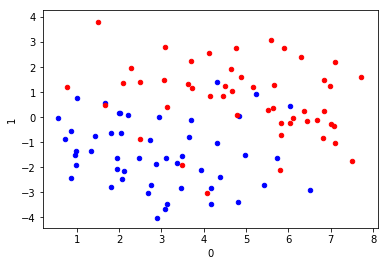

In [4]:
ax = plt.axes()
df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

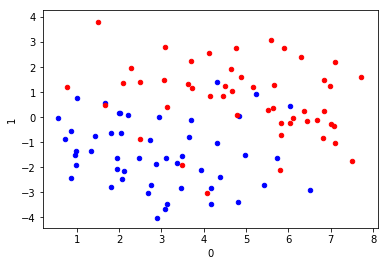

In [5]:
ax = plt.axes()
df_X.loc[df_X['label']==0].plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X[df_X['label']==1].plot.scatter(x=0, y=1, ax=ax, color='red')

In [6]:
Xs = df_X[[0, 1]].values # (99, 2)
#在二维图中描绘X点所处位置，直观查看数据点的分布情况
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs]) # (99, 3)，第一列对应bias
ys = df_X['label'].values

In [7]:
from __future__ import print_function
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False) #因为前面已经将截距项的值合并到变量中，此处参数设置不需要截距项
lr.fit(Xs, ys) #拟合
score = lr.score(Xs, ys) #结果评价
print("Coefficient: %s" % lr.coef_)
print("Score: %s" % score)

Coefficient: [[-1.70090714  0.55446484  1.07222372]]
Score: 0.898989898989899
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


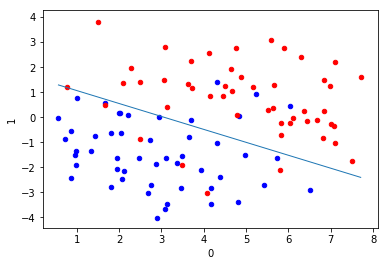

In [8]:
ax = plt.axes()

df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

#将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
_ys = (lr.coef_[0][0] + lr.coef_[0][1] * _xs) / (- lr.coef_[0][2])
plt.plot(_xs, _ys, lw=1)

In [9]:
print(_xs)
print(_ys)

[0.57079941 7.7054006 ]
[ 1.29116612 -2.39825561]


## 2. 梯度下降法

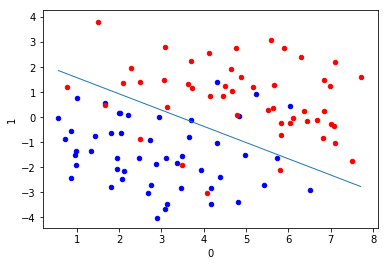

In [10]:
class LGR_GD():
    def __init__(self):
        self.w = None 
        self.n_iters = None
    def fit(self,X,y,alpha=0.03,loss = 1e-10): # 设定步长为0.002，判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((d,1)) #将参数的初始值定为0
        cost = 1e5
        tol = 1e5
        self.n_iters = 0
        #============================= show me your code =======================
        while tol > loss: #设置收敛条件
            y_pred = self.predict(X)
            delta_w = X.T.dot(y_pred - y) / m
            self.w = self.w - alpha * delta_w
            cost_pre = cost
            cost = np.mean(y * y_pred + (1 - y) * (1 - y_pred))
            tol = abs(cost - cost_pre)

            self.n_iters += 1 #更新迭代次数
         #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_logit = X.dot(self.w)
        y_pred = 1 / (1 + np.exp(-y_logit))
        return y_pred  

if __name__ == "__main__":
    lgr_gd = LGR_GD()
    lgr_gd.fit(Xs,ys)

    ax = plt.axes()

    df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
    df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

    _xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
    _ys = (lgr_gd.w[0][0] + lgr_gd.w[1][0] * _xs) / (- lgr_gd.w[2][0])
    plt.plot(_xs, _ys, lw=1)

## 牛顿法

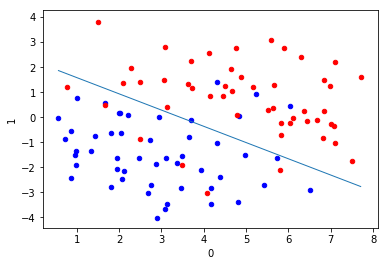

In [13]:
class LGR_NT():
    def __init__(self):
        self.w = None
        self.n_iters = None
    def fit(self,X,y,loss = 1e-10): # 判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((d,1)) #将参数的初始值定为0
        tol = 1e5
        cost = 1e5
        self.n_iters =0
        Hessian = np.zeros((d,d))
        #============================= show me your code =======================
        while tol > loss:
            y_pred = self.predict(X)
            delta_first_order = X.T.dot(y_pred - y) / m
            # X.T * y_hat * (1 - y_hat) * X
            delta_second_order = X.T.dot(np.diag(y_pred.reshape(-1))).dot(np.diag((1 - y_pred).reshape(-1))).dot(X) / m
            delta_w = np.linalg.inv(delta_second_order).dot(delta_first_order)
            self.w = self.w - delta_w
            cost_pre = cost
            cost = np.mean(y * y_pred + (1 - y) * (1 - y_pred))
            tol = abs(cost_pre - cost)

            # theta = self.w - delta_w
            # tol = np.sum(np.abs(theta - self.w))
            # self.w = theta

            self.n_iters += 1
        #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_logit = X.dot(self.w)
        y_pred = 1 / (1 + np.exp(-y_logit))
        return y_pred   

if __name__ == "__main__":
    lgr_nt = LGR_NT()
    lgr_nt.fit(Xs,ys)

    ax = plt.axes()

    df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
    df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

    _xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
    _ys = (lgr_nt.w[0][0] + lgr_nt.w[1][0] * _xs) / (- lgr_nt.w[2][0])
    plt.plot(_xs, _ys, lw=1)

In [14]:
print("梯度下降法结果参数：%s;梯度下降法迭代次数：%s" %(lgr_gd.w,lgr_gd.n_iters))
print("牛顿法结果参数：%s;牛顿法迭代次数：%s" %(lgr_nt.w,lgr_nt.n_iters))

梯度下降法结果参数：[[-2.6204996 ]
 [ 0.7603689 ]
 [ 1.17194586]];梯度下降法迭代次数：23874
牛顿法结果参数：[[-2.6205116 ]
 [ 0.76037154]
 [ 1.17194674]];牛顿法迭代次数：8
